In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
path='../../Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/K-Nearest-Neighbors/'

In [20]:
ls ../../Python-Data-Science-and-Machine-Learning-Bootcamp/Machine\ Learning\ Sections/K-Nearest-Neighbors/Classified\ Data

../../Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/K-Nearest-Neighbors/Classified Data


In [22]:
path='../../Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/K-Nearest-Neighbors/Classified Data'
df = pd.read_csv(path,index_col=0)

In [23]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [27]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
StandardScaler(copy=True,with_mean=True,with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [31]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ..., 
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [38]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [39]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [40]:
from sklearn.cross_validation import train_test_split

/home/eavdeeva/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
X = scaled_features #or one can pass df_feat
y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=101)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [51]:
pred = knn.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[165   8]
 [ 17 140]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       173
          1       0.95      0.89      0.92       157

avg / total       0.93      0.92      0.92       330



In [55]:
# Use elbow method to choose a correct k-value

In [62]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

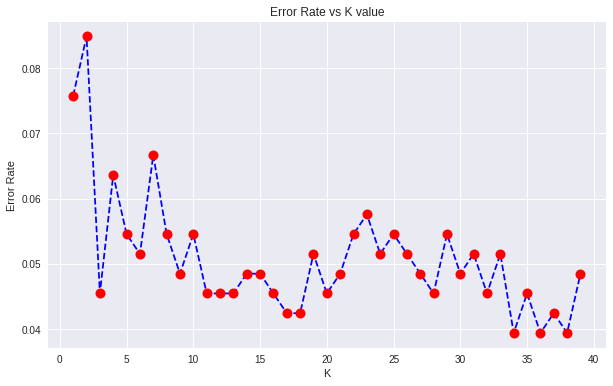

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [64]:
# Let's pick k=17

In [65]:
knn= KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[168   5]
 [  9 148]]


             precision    recall  f1-score   support

          0       0.95      0.97      0.96       173
          1       0.97      0.94      0.95       157

avg / total       0.96      0.96      0.96       330

